# Hypothesis Testing, Combinations of Tests, and Stratified Tests

## Hypotheses

A _scientific hypothesis_ is an assertion about the world, for instance "this drug increases longevity in patients with Alzheimer's Disease," "the outcome of the 2020 presidential election would have been different, but for fraud," "to 6 significant digits, the gravitational constant is $6.67430e-11 Nm^2kg^{-2}$," "the Moderna COVID-19 vaccine is at least 90% effective for at least 6 months for all ages," "students give female instructorss lower ratings than equally effective male instructors," "the universe is expanding at an increasing rate," "there is a black hole at the center of the universe," or "female faculty job applicants are interrupted more frequently during their job talks than male applicants are."

A _statistical hypothesis_ is an assertion about the probability distribution $\mathbb{P}$ of data $X$.

Generally, statistical hypotheses are interesting only insofar as they help us evaluate scientific 
hypotheses.
Whenever a statistical hypothesis is being tested, pay attention to the connection between that hypothesis and the scientific hypothesis it purports to represent.

### Types of Statistical Hypotheses

A _simple_ statistical hypothesis is an assertion that completely specifies the probability distribution of the data, e.g., $\mathbb{P} = \mathbb{P}_0$ for some distribution $\mathbb{P}_0$. Here are some simple hypotheses:

* $X \sim N(0,1)$ The data have a standard normal distribution.
* $X \sim U[0,1]$ The data have a standard uniform distribution.
* $X \sim N(\mu, \Sigma)$ for a given $\mu \in \Re^n$ and positive semi-definite $n \times n$ matrix $\Sigma$. The data are jointly normally distributed with mean $\mu$ and covariance matrix $\Sigma$.
* $\{X_j\}\; \mbox{IID} \; U[0, 17]$. The components of the data are independent and identically distributed with a uniform distribution on $[0, 17]$.
* $X \sim \mbox{Binom}(n, p)$ for given values of $n$ and $p$. The data have a binomial distribution with parameters $n$ and $p$.

A _composite_ hypothesis is an assertion that does not completely specify the distribution; it only says the
distribution is in some specified set of distributions. 
E.g., $\mathbb{P} \in \mathcal{P}_0$ for some set
$\mathcal{P}_0$ of distributions. 
Here are some composite null hypotheses:

* $X \sim N(\mu,1)$, $\mu \in [0, 7]$ The data have a normal distribution with variance 1 and mean between 0 and 7. 
* $X \sim \mbox{Binom}(n, p)$, $p > 1/2$ ($n$ given). The data have a binomial distribution with known parameter $n$ and unknown parameter $p > 1/2$.
* $\mathbb{E}X=0$ The expected value of the data is zero.
* $\mathbb{E}X \le 1/2$ The expected value of the data is at most 1/2.
* The distribution $\mathbb{P}$ of $X$ has at most 3 modes.
* $\{X_j\}_{j=1}^n$ are _exchangeable_ (A collection of random variables is _exchangeable_ if their joint distribution is invariant under permuting their labels. If a collection of random variables is IID, it is also exchangeable.)
* The distribution of $X$ is spherically symmetric
* The $q$th quantile of the probability distribution of the data is $x$

A common statistical question is to use data to assess whether a statistical hypothesis is true: to _test_ the hypothesis.
There is always more than one explanation for any particular set of data, so in general, it is not
possible to prove that a (simple) statistical hypothesis is _true_.
But the data might provide evidence that a hypothesis is _false_.
This is tied to Popper's notion that only hypotheses that can be falsified by evidence (potentially shown to be false) are scientific hypotheses.

We speak of "rejecting" a hypothesis when there is sufficiently strong evidence that the hypothesis is false.
But if data do not cast doubt on a hypothesis, that is not evidence that the hypothesis is true--it is only absense of evidence that the hypothesis is false.
Additional evidence might cast doubt on the hypothesis.
When we speak (informally) of "accepting" a hypothesis, it means only that we did not reject it on the basis of a particular set of data, not that we
have affirmative evidence that it is true.

To test a statistical hypothesis, one specifies a set $A$ of possible data values (before examining the data). 
If the data fall inside that set, i.e., if $X \in A$, the null hypothesis is _not rejected_; otherwise, the null hypothesis is _rejected_.
Each (measurable) set $A$ implicitly defines a hypothesis test.
The set $A$ is called the _acceptance region_ for the test.

Sometimes the set $A$ is defined explicitly, but
more often it is defined implicitly in terms of a _test statistic_, a function of the data that does not depend on any unknown parameters.

For instance an acceptance region for testing the hypothesis that $\{X_j\}_{j=1}^n$ are IID $N(0,1)$ might be
\begin{eqnarray*}
A := \left \{x = \{x_1, \ldots, x_n\}: \frac{1}{n} \sum_{j=1}^n x_j \le \frac{c}{\sqrt{n}} \right \}.
\end{eqnarray*}
In this example, the test statistic is the sample mean, and the region $A$ is the set of all data for which the
sample mean does not exceed $c/\sqrt{n}$.

### Test functions versus acceptance regions

Instead of working with a set $A$, we can work with the indicator function of the set $A$, 
\begin{eqnarray*}
1_A &:& \mathcal{X} \rightarrow \{0, 1\} \\
       && x  \mapsto \left \{ \begin{array}{ll}
                    1, & x \in A \\
                    0, & \mbox{ otherwise. } 
                    \end{array} \right .
\end{eqnarray*}
Then we reject the null hypothesis if $1_A(X) = 0$ and do not reject it if $1_A(X) = 1$.

This can be generalized by using a _test function_ or _critical function_ $\phi(\cdot)$ that take 
values in $[0,1]$ rather than just $\{0, 1\}$, as described below.
In that case, when $X=x$, the test rejects the null with probability $\phi(x)$, i.e.,
if $\phi(X) = 0$, the test certainly does not reject the null;
if $\phi(X) = 1$, the test certainly rejects the null; and if $\phi(X) = q \in (0, 1)$,
it rejects the null with probability $q$.
This is called a _randomized test_, discussed further below.

### Aside on notation

The following all mean the same thing, namely, the probability that the random variable $X$ takes a value in the set $A$ if the distribution of $X$ is $\mathbb{P}_0$:

\begin{equation*}
\Pr \{X \in A || X \sim \mathbb{P}_0 \},
\end{equation*}
\begin{equation*}
\Pr_{X \sim \mathbb{P}_0} \{X \in A\},
\end{equation*}
and
\begin{equation*}
\mathbb{P}_0 \{X \in A\}.
\end{equation*}

For expectations, we use similar notation:

\begin{equation*}
\mathbb{E} (X || X \sim \mathbb{P}_0)
\end{equation*}
\begin{equation*}
\mathbb{E}_{X \sim \mathbb{P}_0} X ,
\end{equation*}
\begin{equation*}
\mathbb{E}_{\mathbb{P}_0} X,
\end{equation*}
and sometimes
\begin{equation*}
\mathbb{E}_0 X
\end{equation*}
or even
\begin{equation*}
\mathbb{P}_0 X
\end{equation*}


## Significance level

The _significance level_ of the test $A$ of the simple null hypothesis $X \sim \mathbb{P}_0$ is the probability that the test rejects the null hypothesis when the null hypothesis is true:
\begin{equation*}
   \alpha := \mathbb{P}_0 \{X \notin A \}.
\end{equation*}
Because the expected value of an indicator function is the probability of the set, this can be written
\begin{equation*}
   \alpha := 1-\mathbb{E}_{\mathbb{P}_0} 1_A(X).
\end{equation*}
For a test based on the test function $\phi: \mathcal{X} \rightarrow [0,1]$,
the significance level of the simple null hypothesis $X \sim \mathbb{P}_0$ is
\begin{equation*}
   \alpha := 1-\mathbb{E}_{\mathbb{P}_0} \phi(X).
\end{equation*}

Why is this expression the probability of rejecting the null when the null is true?
The test rejects when $U \ge \phi(X)$.
By the law of total expectation (see [Inequalities and Identities](./math-inequalities.ipynb)) and using the fact that $X$ and $U$ are independent,
\begin{equation*}
\mathbb{P}_{0,U} \{ U \ge \phi(X)\} = 
\mathbb{E}_{\mathbb{P}_0, U} 1_{U \ge \phi(X)} = 
\mathbb{E}_{\mathbb{P}_0} \mathbb{E}_U (1_{U \ge \phi(X)} | \phi(X)) =
\mathbb{E}_{\mathbb{P}_0} (1-\phi(X)) = 1 - \mathbb{E}_{\mathbb{P}_0} \phi(X).
\end{equation*}

The _significance level_ of the test $A$ of the composite null hypothesis $H_0: X \sim \mathbb{P} \in \mathcal{P}_0$ is
\begin{equation*}
   \alpha := \sup_{\mathbb{P_0} \in \mathcal{P}_0} \mathbb{P}_0 \{X \notin A \}.
\end{equation*}
That is, it is the largest probability that that the test rejects the null hypothesis when the null hypothesis is true.
For a test based on a a test function $\phi: \mathcal{X} \rightarrow [0,1]$,
the significance level of the simple null hypothesis $X \sim \mathbb{P}_0$ is
\begin{equation*}
   \alpha := 1- \inf_{\mathbb{P_0} \in \mathcal{P}_0} \mathbb{E}_{\mathbb{P}_0} \phi(X).
\end{equation*}

When $\mathcal{P}_0$ contains only one distribution, the two definitions of significance level coincide.

## Power

The _power_ of the test $A$ against the simple hypothesis $H_1: X \sim \mathbb{P}_1$ is 

\begin{equation*}
   1-\beta := \mathbb{P}_1 \{X \notin A \}
\end{equation*}
That is, the power is the chance that the test rejects the null hypothesis $H_0$ when the alternative hypothesis $H_1$ is true.

For a test based on a test function $\phi$, the power is
\begin{equation*}
   1-\beta := 1 - \mathbb{E}_{\mathbb{P}_1} \phi(X).
\end{equation*}

The _power_ of the test $A$ against the composite alternative hypothesis $H_1: X \sim \mathbb{P} \in \mathcal{P}_1$ is
\begin{equation*}
   1-\beta := \inf_{\mathbb{P_1} \in \mathcal{P}_1} \mathbb{P}_1 \{X \notin A \}.
\end{equation*}
That is, it is the smallest probability that that the test rejects the null hypothesis when the alternative hypothesis is true.

For a test based on a test function $\phi$, the power is
\begin{equation*}
   1-\beta := 1 - \sup_{\mathbb{P_1} \in \mathcal{P}_1}\mathbb{E}_{\mathbb{P}_1} \phi(X).
\end{equation*}

When the alternative $\mathcal{P}_1$ contains only one distribution, the two definitions coincide.

Power and significance level are the (extremal) probability of the same event--namely, rejecting the null hypothesis--but computed under different assumptions.
The power is computed under the assumption that the alternative hypothesis is true; the significance level is computed under the assumption that the null hypothesis is true.

Seminal work by Jerzy Neyman (the founder of Berkeley's Department of Statistics) and Egon Pearson showed how to find the most powerful test of a simple null hypothesis against a simple alternative hypothesis among all tests with a given significance level. They showed that the most powerful test had an acceptance region characterized by the likelihood ratio; see below.

## Type I and Type II errors

A type I error occurs when a test rejects the null hypothesis but the null hypothesis is true.
The chance of a type I error is the significance level of the test.


A type II error occurs when a test does not reject the null hypothesis the null hypothesis is false.
The chance of a type II error when a particular alternative is true is 100% minus the power of the test
against that alternative, i.e., $\beta$.

 

## Type III errors

There are a number of informal definitions of type III errors. 

One is that a Type III error occurs when a test correctly rejects the null hypothesis "for the wrong reason." For instance, suppose that we test the null hypothesis $X \sim N(0, 1)$
at significance level $\alpha = 0.05$ by defining $A := \{x: |x| \le 1.96\}$. 
Suppose that in reality $X \sim N(-1, 1)$ and we observe $X = 2$. 
Then we would _correctly_ reject $H_0$, but because $X$ was "too big," while it was much more likely to be "too small" since in reality the distribution of $X$ has mean $-1$ instead of $0$. (If, after rejecting $H_0$, we concluded that $\mathbb{E}X > 0$, that directional conclusion would be wrong.)

Similarly, suppose we want to test whether the mean of some finite population is zero from a simple random sample $X = (X_1, \ldots, X_n)$.
We set $A = \{x \in \Re^n : |\bar{x}| \le z_\alpha/\sqrt{n} \}$, where $z_\alpha$ is the $1-\alpha$ percentage
point of the standard normal distribution.
This is a significance level $\alpha$ test of the null hypothesis that $X \sim N(0, 1)$ from an IID sample, not 
of the null hypothesis that the population mean is zero from a random sample without replacement.
Nonetheless, this incorrect test might correctly reject the null hypothesis.

Another informal definition is that a Type III error occurs when one gets the right answer to the wrong question.
One example is testing the hypothesis $\mathbb{E}X=0$ by testing the hypothesis $X \sim N(0, \sigma^2)$ when
there is no reason to think that $X$ has a normal distribution. Even if the test is performed correctly,
it is testing the wrong null.

In my experience, the most frequent and pernicious Type III errors involve testing a _statistical hypothesis_ that has little or nothing to do with the _scientific hypothesis_ (aside, perhaps, from having some words in common).
*Many* hypothesis tests in applications have this sort of Type III error baked in. 
Indeed, most analyses of clinical trial data I've seen test a statistical null hypothesis that involves selecting subjects at random from a superpopulation--which did not occur--rather than test a statistical hypothesis based on the randomization of subjects into treatment or control--which actually did occur.

It is quite common to base $\mathbb{P}_0$ on a statistical model that has no connection to the scientific hypothesis and how the data were generated, then to claim that rejecting $\mathbb{P}_0$ says something about the world. 
That logic is flawed.

### Randomized tests

Sometimes it is useful for a hypothesis test to depend not only on the data but also on "auxilliary" randomness, typically a $U[0, 1]$ variable $U$ that is independent of the data $X$. 
Then the acceptance region $A$ is a subset of the Cartesian product of the data space and $[0, 1]$. 
The null hypothesis is not rejected if $(X, U) \in A$; otherwise it is rejected.

Randomized tests arise in a number of situations, including tests involving discrete distributions.
Randomized tests are also useful for proving theorems about tests. 
For instance, _the Neyman-Pearson lemma_ shows that the most powerful test of a simple null hypothesis $X \sim \mathbb{P}_0$ against a simple alternative hypothesis $X \sim \mathbb{P}_1$ at significance level $\alpha$ is
a randomized test of the form:

\begin{equation*}
A = \{ (x, u): \mathcal{L}_0(x)/\mathcal{L}_1(x) > c \} \cup \{ (x, u): (\mathcal{L}_0(x)/\mathcal{L}_1(x) = c) \mbox{ and }
  (u \le d) \}
\end{equation*}
for suitable choices of $c$ and $d$,
where $\mathcal{L}_j(x)$ is the likelihood of hypothesis $j$ for data $x$. 
(This assumes $\mathbb{P}_0$ and $\mathbb{P}_1$ are _absolutely continuous_ with respect to each other.)
For a definition of the likelihood function, see [Bayesian and Frequentist Estimation and Inference](./bayes.ipynb).

A test based on a test function $\phi: \mathcal{X} \rightarrow [0, 1]$ is implicitly
a randomized test if $\phi$ can have a value strictly between 0 and 1.
Then, we also use an auxilliary randomness, $U \sim U[0,1]$ and reject the null
if $U \ge \phi(X)$.
This is completely equivalent to the description above, but instead of thinking
in terms of a _set_ $A \subset \mathcal{X} \times [0, 1]$, we think of a _function_
$\phi: \mathcal{X} \rightarrow [0, 1]$.
In both formulations, we use $X$ and $U$ to decide whether to reject $H_0$.

## $P$-values

Here are two approaches to defining $P$-values, in terms of families of hypothesis tests and in terms of a test statistic.

Family of tests:
+ Suppose you have a set of nested (monotone) hypothesis tests:

    - $\{A_\alpha : \alpha \in (0, 1] \}$

    - $\mathbb{P}_0 \{ X \notin A_\alpha \} \le \alpha$ (or more generally, $\mathbb{P} \{ X \notin A_\alpha \} \le \alpha, \; \forall \mathbb{P} \in \mathcal{P}_0$)

    - $A_\alpha \subset A_\beta$ if $\beta < \alpha$ (Can always re-define $A_\alpha \leftarrow \cup_{\beta \ge \alpha } A_\beta$)
    
+ If we observe $X = x$, the $P$-value is $\sup \{ \alpha: x \in A_\alpha \}$.


Test statistic definition of a $P$-value:

If $P = P(X)$ is a random variable whose probability distribution is _dominated_ by the uniform distribution on $[0, 1]$ when
the null hypothesis is true, then $P$ is a $P$-value.

That is, $P$ is a $P$-value if
\begin{equation*}  
 \mathbb{P}_0 \{ P(X) \le x \} \le x \;\; \forall x \in [0, 1].
\end{equation*}

You may hear someone say that a $P$-value is the chance that a test statistic is "as extreme or more extreme than
observed."
That is not really a precise mathematical definition; moreover, not every $P$-value can be expressed naturally
in that form and not everything of that form is a $P$-value.

For randomized tests expressed in terms of acceptance regions, $P(X, U)$ is a $P$-value if
\begin{equation*}  
 \mathbb{P}_0 \{ P(X,U) \le x \} \le x \;\; \forall x \in [0, 1].
\end{equation*}

## The $Z$-test

A $Z$-test tests the hypothesis that some function of the data has a standard Normal distribution, that is,
the hypothesis that for some given test statistic $f(x)$, $f(X) \sim N(0,1)$.

What kinds of things have a standard normal distribution?

+ A random draw from a population that has a standard normal distribution.
+ The sample mean of $n$ IID draws from a population that has a standard normal distribution, after multiplying the sample mean by $\sqrt{n}$.
+ The sample mean of $n$ IID draws from a population that has a $N(\mu, \sigma^2)$ distribution, after subtracting $\mu$ and multiplying by $\sqrt{n}/\sigma$.

The $Z$-test is often used as an _approximate_ test rather than an _exact_ test. 
An _approximate_ test is one that has approximately its nominal significance level.  
What kinds of things have distributions that are approximately standard normal?

+ Things that have a Binomial$(n, p)$ distribution, after subtracting $np$ and dividing by $\sqrt{np(1-p)}$, provided $np$ and $n(1-p)$ are not small. For instance, consider tossing a fair coin 100 times, independently. The number $X$ of heads has a Binomial$(100, 1/2)$ distribution. The distribution of $(X-50)/5$ is approximately a standard normal. ($np(1-p) = 100\times 1/2 \times 1/2$, so $\sqrt{np(1-p)} = 5$.)
+ The sample mean of $n$ IID draws with replacement from a finite population of numbers, after subtracting the population mean $\mu$ and dividing by $\sigma/\sqrt{n}$, where $\sigma$ is the population standard deviation, provided $n$ is sufficiently large and the population distribution is sufficiently "bell shaped." If nothing is known about the population, it is in general impossible to know how accurate the normal approximation to the sample mean is.
(The Binomial distribution is a special case where the population values are known to be 0 and 1.)

When the test statistic is only approximately normally distributed under the null hypothesis, the accuracy
of the approximation matters--but is rarely addressed.

### Example of an approximate $Z$-test with a built-in Type III error

There are two binary populations, $\{x_j\}_{j=1}^n$ and $\{y_j\}_{j=1}^m$. (A population is _binary_ if the only possible values in the population are 0 and 1.)
We are interested in whether the populations are "surprisingly different."
The null hypothesis is that the two populations were formed by selecting $n$ items at random from the overall group of $n+m$ items to form the first population, with the remaining $m$ items comprising the second population.

Let $\bar{x} := \frac{1}{n} \sum_j x_j$ and $\bar{y} := \frac{1}{m} y_j$.
If $x$ and $y$ were independent random samples with replacement from the same binary "super-population" that had a fraction $p$ of
1s and a fraction $(1-p)$ of zeros,
$n\bar{x}$ would be a random variable with a binomial distribution with parameters $n$ and $p$, and $m\bar{y}$ would 
be a random variable with
a binomial distribution with parameters $m$ and $p$, and would be independent of $n\bar{x}$.

The expected value of $\bar{x}$ would be $p$ and its variance would be $p(1-p)/n$;
the expected value of $\bar{y}$ would be $p$ and its variance would be $p(1-p)/m$.
The expected value of $\bar{x} - \bar{y}$ would be 0, and its variance would be $p(1-p)(1/n+1/m)$.
Moreover, if $x$ and $y$ were random samples with replacement from the same binary super-population,
$\hat{p} = (n\bar{x} + m\bar{y})/(n+m)$ would be an unbiased estimate of $p$,
and for sufficiently large $m$ and $n$, the distribution of 
\begin{equation*}
f(x,y) := \frac{\bar{x} - \bar{y}}{\sqrt{\hat{p}(1-\hat{p})(1/n+1/m)}}
\end{equation*}
would be approximately $N(0,1)$. 
(The accuracy of the approximation would depend on $n$, $m$, and $p$.)

If we define the acceptance region $A := \{ x, y: |f(x, y)| \le z_{\alpha/2}$, where $z_\alpha$ is the $1-\alpha$ 
percentage point of the standard normal distribution, we get a (two-sided) $Z$ test at nominal significance
level $\alpha$.

But this is an approximate test of a different hypothesis: an approximate answer to a different question,
a Type III error.
The hypothesis test has little to do with the original hypothesis.
The true significance level of the test for the original null hypothesis that the two groups are a random partition
of the $n+m$ items could be quite different from $\alpha$.

### Numerical example

There are two binary populations, $\{x_j\}_{j=1}^N$ and $\{ y_j\}_{j=1}^M$. 
Let $p_x$ denote the mean of the first population and $p_y$ the mean of the second.
We wish to know whether $p_x = p_y$.

A random sample with replacement of size $n = 100$ will be drawn from the first list and a random sample with replacement of size $m = 300$ will be drawn from the second list, independent of the other sample.
Let $X$ denote the sum of the numbers in the sample from the first population and let $Y$ denote the sum of the numbers in the sample from the second population.
Then $X \sim \mbox{Binom}(n, p_x)$, $Y \sim \mbox{Binom}(m, p_y)$, and $X$ and $Y$ are independent.

(An equivalent problem is that there are two coins, one with chance $p_x$ of landing heads and one with chance $p_y$ of landing heads. The first coin is tossed $n$ times and the second coin is tossed $m$ times.
All $m+n$ tosses are independent. Let $X$ be the number of times the first coin lands heads and let $Y$
denote the number of times the second coin lands heads.)

If $p_x = p_y = p$, $X+Y \sim \mbox{Binom}(n+m, p)$ and $\hat{p} := (X+Y)/(n+m)$ is an unbiased estimate of $p$ with standard deviation $\sqrt{p(1-p)/(m+n)} \le 1/(2 \sqrt{m+n}) = 0.025$.

Let $\bar{X} := X/n$ and $\bar{Y} := Y/m$.
If $p_x = p_y = p$ and $p$ is not close to 0 or 1, then the distribution of $\bar{X}$ is approximately Gaussian
with mean $p$ and standard deviation $\sqrt{p(1-p)/n}$ and the distribution of $\bar{Y}$ is approximately Gaussian
with mean $p$ and standard deviation $\sqrt{p(1-p)/m}$, and $\bar{X}$ and $\bar{Y}$ are independent.

It follows that the distribution of $\bar{X}-\bar{Y}$ is approximately Gaussian with mean $p-p = 0$ and standard deviation 
\begin{eqnarray*}
\sigma := \sqrt{p(1-p)/n + p(1-p)/m} = \sqrt{p(1-p)}\sqrt{1/n + 1/m} \le 0.0577.
\end{eqnarray*}
Thus the distribution of 
\begin{equation*}
\frac{\bar{X} - \bar{Y}}{\sqrt{p(1-p)}\sqrt{1/n + 1/m}}
\end{equation*}
is approximately the standard normal.
If we use the "plug-in" estimator of $p$, $\hat{p}$, the distribution is also approximately normal (but the accuracy of the approximation is, in general, worse). 
Thus the distribution of
\begin{equation*}
Z := \frac{\bar{X} - \bar{Y}}{\sqrt{\hat{p}(1-\hat{p})}\sqrt{1/n + 1/m}}
\end{equation*}
is approximately $N(0,1)$ if $p_x = p_y$.

Note that if $p$ is close to 0 or to 1, $\hat{p}$ could end up equal to 0 or 1, in which case the denominator will
vanish (clearly underestimating the standard deviation of $\bar{X}-\bar{Y}$).

To perform a $Z$ test, we pretend that the distribution of $Z$ is exactly the standard normal.
If $p_x > p_y$, we expect $\bar{X} > \bar{Y}$ and hence $Z > 0$. If $p_x < p_y$, we expect $\bar{X} < \bar{Y}$ and hence $Z < 0$.
If we want the test to have power against both the possibility that $p_x > p_y$ and the possibility that $p_x < p_y$, we would design the test to reject when $|Z|$ is large.
To test at (approximate) level $\alpha$, we would reject with $|Z| > z_{1-\alpha/2}$, the $1-\alpha/2$ quantile of the standard normal distribution.

In [1]:
# simulating the significance level of the Z-test
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from scipy.stats import norm # the normal distribution
from numpy.random import default_rng, binomial  # this is the Mersenne Twister; there's much to consider in picking a PRNG.
rng = default_rng(1592592021)   # set the seed for reproducibility

alpha = 0.05 # significance level 5%
z_c = norm.ppf(1-alpha/2)  # normal quantile, critical value for the test

p = [.01, .05, .1, .3, .4, .5, .6, .7, .9, .95, .99]  # assortment of values for p

reps = int(10**6)
n = 50  
m = 100 

def absZ(n: int, m: int, x: float, y: float) -> float:
    '''
    absolute value of the Z statistic for the difference in sample sums from two binary populations
    
    Used in a Z test of the hypothesis that x and y are the sample sums of IID draws from binary
    populations with the same (unspecified) population fraction of 1s against the alternative
    hypothesis that the two population fractions differ.
    
    When the population percentages are close to 0 or 1, the sample percentages can be 0 or 1,
    in which case the estimated variance will be zero. In that situation, return -inf or inf, 
    as appropriate.
    
    Parameters
    ----------
    n : int
        sample size from first population
    m : int
        sample size from second population
    x : float
        sample sum of the draws from the first population
    y : float
        sample sum of the draws from the second population
        
    Returns
    -------
    z : float
        absolute value of the Z statistic
        
    '''
    pHat = (x+y)/(n+m)
    return (abs((x/n - y/m)/math.sqrt(pHat*(1-pHat)*(1/n + 1/m)))
           if pHat*(1-pHat) > 0
           else np.inf*np.sign(x/n - y/m))

# how precise should we expect the result to be?
print('max SD of alpha-hat: {}'.format((1/(2*math.sqrt(reps)))))  # max SD of a binomial is 1/2

for pj in p:
    reject = 0
    for i in range(reps):
        X = rng.binomial(n, pj) # simulate X
        Y = rng.binomial(m, pj) # simulate Y. X and Y could be simulated together but the code would be less clear
        reject += (1 
                  if absZ(n,m,X,Y) > z_c
                  else 0)
    print('p={} estimated alpha={}'.format(pj, reject/reps))



max SD of alpha-hat: 0.0005


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


p=0.01 estimated alpha=0.033563
p=0.05 estimated alpha=0.039816
p=0.1 estimated alpha=0.049005
p=0.3 estimated alpha=0.050683
p=0.4 estimated alpha=0.052481
p=0.5 estimated alpha=0.057022
p=0.6 estimated alpha=0.052372
p=0.7 estimated alpha=0.050798
p=0.9 estimated alpha=0.049088
p=0.95 estimated alpha=0.039562
p=0.99 estimated alpha=0.03344


As you can see, the simulation estimate of the actual significance level differs from the nominal significance level, 5%, by more than simulation variability accounts for: the test is only approximate, and the accuracy of the approximation depends on the true value of $p$. The actual significance level is below 5% when the true $p$ is near 0 or 1, and above 5% when the true $p$ is near 1/2.

Now let's look at the distribution of approximate $P$-values for (a one-sided version of) this test. 
If $Z$ really had a standard normal distribution, then for $z \ge 0$,
\begin{equation*}
\Pr \{|Z| \le z \} = 1 - 2\Phi(-z) =  2\Phi(z) - 1,
\end{equation*}
where $\Phi$ is the standard normal CDF.
Let $x := 2\Phi(z) - 1$.
Then 
\begin{equation*}
x = \Pr \{ |Z| \le \Phi^{-1}((x+1)/2) \}
\end{equation*}
\begin{equation*}
 = \Pr \{ \Phi(|Z|) \le (x+1)/2 \}
\end{equation*}
\begin{equation*}
 = \Pr \{ 2\Phi(|Z|)-1 \le x \}.
\end{equation*}
Thus $2\Phi(|Z|)-1$ would have a uniform distribution: it would be a $P$-value.

Let's check whether that's true.

(array([136995.,  89683.,  86794.,  82063.,  78132., 139366.,  60161.,
        136581.,  95286.,  94939.]),
 array([0.        , 0.09999988, 0.19999976, 0.29999964, 0.39999952,
        0.49999939, 0.59999927, 0.69999915, 0.79999903, 0.89999891,
        0.99999879]),
 <BarContainer object of 10 artists>)

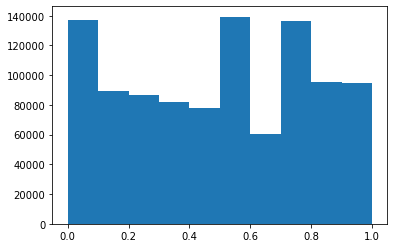

In [2]:
reps = int(10**6)
n = 50
m = 100
p = 0.5  # one of the worst offenders

x = np.zeros(reps)
for i in range(reps):
    X = rng.binomial(n, p) # simulate X
    Y = rng.binomial(m, p) # simulate Y
    x[i] = 2*norm.cdf(absZ(n,m,X,Y)) - 1
    
plt.hist(x)

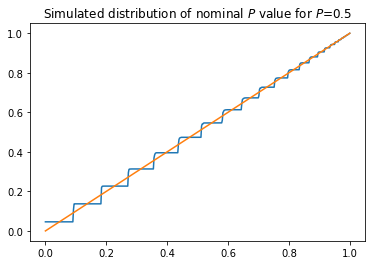

In [3]:
y = np.linspace(0,1,num=500)
cumul = np.array([np.sum(x <= yi) for yi in y])/reps  # simulated CDF

plt.plot(y, cumul)
plt.plot([0,1],[0,1])
plt.title('Simulated distribution of nominal $P$ value for $P$={}'.format(p))
plt.show()

The (simulated) distribution is not dominated by the uniform.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


(array([5.78410e+04, 1.00000e+00, 2.34340e+04, 1.13167e+05, 4.68700e+03,
        2.37444e+05, 1.13710e+05, 6.48320e+04, 1.24849e+05, 3.86530e+04]),
 array([0.        , 0.0999593 , 0.19991861, 0.29987791, 0.39983722,
        0.49979652, 0.59975583, 0.69971513, 0.79967444, 0.89963374,
        0.99959305]),
 <BarContainer object of 10 artists>)

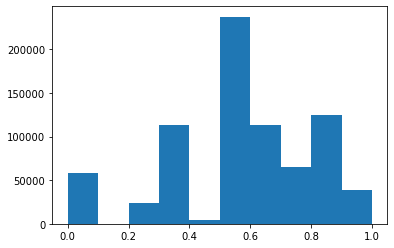

In [4]:
reps = int(10**6)
n = 50
m = 100
p = 0.01  # one of the worst offenders

x = np.zeros(reps)
for i in range(reps):
    X = rng.binomial(n, p) # simulate X
    Y = rng.binomial(m, p) # simulate Y
    x[i] = 2*norm.cdf(absZ(n,m,X,Y)) - 1
    
plt.hist(x)

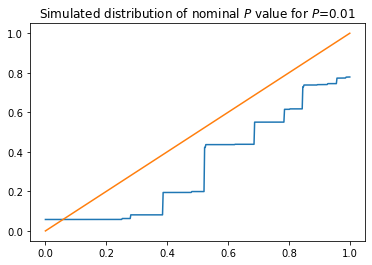

In [5]:
y = np.linspace(0,1,num=500)
cumul = np.array([np.sum(x <= yi) for yi in y])/reps  # simulated CDF

plt.plot(y, cumul)
plt.plot([0,1],[0,1])
plt.title('Simulated distribution of nominal $P$ value for $P$={}'.format(p))
plt.show()

Again, the (simulated) distribution is not dominated by the uniform. The _nominal_ $P$-value based on treating the $Z$-statistic as if it had a standard normal distribution is not an _actual_ $P$-value for this problem.

### An exact conditional test based on invariance: permutation methods

We now explore a different approach that yields an exact test rather than approximate test.

Let $N := n+m$.
Let $I_1, \ldots, I_n$ be the values of the draws from the first population and $I_{n+1}, \ldots, I_N$ be
the values of the draws from the second population. 
Because the draws are all independent, $\{I_j\}$ are independent random variables with a Bernoulli distribution. 
If $p_x = p_y$, they are identically distributed also.

Define the random vector $I := (I_j)_{j=1}^N$.
Let $\pi$ be a permutation of $1, 2, \ldots, N$.
(That is, $\pi = (\pi_1, \ldots, \pi_N)$ is a vector of length $N$ in which every number between $1$ and $N$ appears exactly once.)
Define the vector $I_\pi := (I_{\pi_j})_{j=1}^N$. 
This vector has the same components as $I$, but in a different order (unless $\pi$ is the identity permutation).
Because the draws are IID, the joint probability distribution of this permutation of the draws is
the same as the joint probability distribution of the original draws: the components of $I$ are _exchangeable_
random variables if the null hypothesis is true.

Equivalently, let $z$ be a vector of length $N$.
Then $\mathbb{P}_0 \{I = z \} = \mathbb{P}_0 \{I = z_\pi \}$ for all $N!$ permutations $\pi$.
Whatever vector of values $z$ was actually observed, if the null hypothesis is true, all permutations of those values
were equally likely to have been observed instead.
In turn, that implies that all $\binom{N}{n}$ multisubsets of size $n$ of the $n+m$ components of $z$ 
were equally likely to be the sample from the first population (with the other $m$ values 
comprising the sample from the second population).

Let $\{z\}$ denote the _multiset_ of elements of $x$. 
(See, e.g., [Mathematical Foundations](./math-foundations.ipynb)
for the distinction between a set and a multiset.)
Consider the event that $\{I\} = \{z\}$, that is, that the multiset of observed data is equal to the multiset of
elements of $z$.
Then
\begin{equation*}
  \mathbb{P}_0(I = z_\pi | \{I\} = \{z\}) = \mathbb{P}_0(I = z | \{I\} = \{z\})
\end{equation*}
for all permutations $\pi$ of $\{1, \ldots, n+m\}$.

It follows that the sample from the first population is equally likely to be any multisubset of $n$ of the 
$n+m$ elements of the pooled sample, given the elements of the pooled sample.
That is, the conditional probability distribution of the sample from the first population is like that of a simple random sample of size $n$ from the $N$ elements of the pooled sample, given the elements of the pooled sample.

The pooled sample in this example consists of $G = \sum_{j=1}^N I_j$ 1s and $N-G$ 0s.
Given $G$, the conditional distribution of the number of 1s in the sample from the first population is hypergeometric with parameters $N=N$ (population size), $G=G$ (number of "good" items in the population), and $n=n$ (sample size from the population).
Recall that $X$ is the sum of the draws from the first population and $Y$ is the sum of the draws from the second
population.
We have
\begin{equation*}
\mathbb{P}_0 \{ X = k | G=g \} = \left \{ \begin{array}{ll}
   \frac{\binom{g}{k}\binom{N-g}{n-k}}{\binom{N}{n}}, & \max(0, g-m) \le k \le \min(n,g) \\
   0, & \mbox{otherwise.}
   \end{array}
   \right .
\end{equation*}
Moreover, given $G$, $X$ and $Y$ are dependent, since $X+Y = G$.

We can base a (conditional) test of the hypothesis $p_0 = p_1$ on the conditional
hypergeometric distribution of $X$.
Because the hypergeometric is discrete, for some values of $n$, $m$, $G$, and $\alpha$ we will need a randomized
test $A=A_{\alpha;g}(\cdot, \cdot)$ to attain exactly level $\alpha$.

What shall we use as the acceptance region?
To have power against the alternative that $p_x > p_y$ and the alternative $p_x < p_y$, we should
reject if $X$ is "too small" or if $X$ is "too big." 
There are any number of ways we could trade off small and big.
For instance, we could make the acceptance region $A = A_{\alpha;g}(x,u)$ nearly symmetric around 
$\mathbb{E}(X|G) = nG/N$.
Or we could make the chance of rejecting when $X$ is too small equal to the chance of rejecting when $X$ is too big.

We will do something else: pick the acceptance region to include
as few values in $\{0, \ldots, n\}$ as possible.
That means omitting from $A$ the possible values of $X$ that have the lowest (conditional) probabilities.
Because the hypergeometric distribution is unimodal, this yelds a test that rejects when $X$ is "in the tails" of the hypergeometric distribution, as desired.
Let $\mathcal{I}$ denote the smallest subset of $\{0, \ldots, n\}$ such that 
\begin{equation*}
\mathbb{P}_0 \{X \in \mathcal{I} | G=g \} < 1-\alpha
\end{equation*}
Define
\begin{equation*}
\mathcal{J} := \arg \max_{j \notin \mathcal{I}} \mathbb{P}_0 \{ X = j | G=g \}
\end{equation*}
be the outcome or outcomes with largest conditional probability not included in $\mathcal{I}$.
Let 
\begin{equation*}
\gamma := \frac{(1-\alpha) - \mathbb{P}_0 \{X \in \mathcal{I} | G=g \}}{\mathbb{P}_0 \{X \in \mathcal{J} |G=g\}}
\end{equation*}
be the fraction of the probability of $\mathcal{J}$ that needs to be added to the probability of $\mathcal{I}$ to make
the sum equal $1-\alpha$.
Define the acceptance region 
\begin{equation*}
A_{\alpha; g} = \{ (x,u) \in \mathcal{I} \times [0,1] \} \cup \{ (x, u): x \in \mathcal{J} \mbox{ and } u \le \gamma \}.
\end{equation*}
Let $U$ be a $U[0,1]$ random variable independent of $X$.
Then
\begin{equation*}
\mathbb{P}_0 \{ (X, U) \in A_{\alpha; g} | G=g \} = 1-\alpha.
\end{equation*}
That is, $A$ is an acceptance region for a test of the null hypothesis with conditional significance level $\alpha$. 

Conditioning on $G$ eliminates the nuisance parameter $p$, the fraction of ones in the two populations
from which the sample was drawn: whatever $p$ might be, and whatever the fraction of ones in the sample, every random sample of $n$ of the $n+m$ observations is equally likely to have been the sample from the first population, if the null hypothesis is true.
See [Introduction to Permutation Tests](./permute-intro.ipynb).

This test, in a slightly different form, is called _Fisher's Exact Test_.
It is useful for a wide range of problems, including clinical trials and A/B testing.

### Illustration

To visualize what's going on, suppose $n=m=10$ and $G=5$. Under the null, the conditional distribution of $X$ given $G=5$ is hypergeometric with parameters $N=n+m=20$, $G=5$, and $n=10$.
The pmf of that distribution is plotted below.

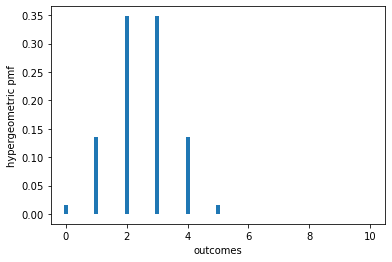

pmf: [(0, 0.016253869969040196), (1, 0.13544891640866824), (2, 0.34829721362229055), (3, 0.34829721362229055), (4, 0.13544891640866824), (5, 0.016253869969040196), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0)]


In [6]:
from scipy.stats import hypergeom # the hypergeometric distribution
n=10
m=10
N=n+m
G=5
x = np.arange(0,n+1)

pmf = hypergeom.pmf(x,N,G,n)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.vlines(x, 0, pmf, lw=4)
ax.set_xlabel('outcomes')
ax.set_ylabel('hypergeometric pmf')
plt.show()
print('pmf: {}'.format(list(zip(x,pmf))))

In [7]:
# probability of rejecting when X \in {1, 5} to get overall level 0.05
alpha = 0.05
(alpha-(pmf[0]+pmf[5]))/(pmf[1]+pmf[4])

0.0645714285714292

To construct the acceptance region for a level $\alpha = 0.05$ test, first notice that $\mathbb{P}_0\{X > 5 | G=5\} = 0$, so the outcomes 6, 7, ..., 10 should be outside $\mathcal{I}$.

$\mathbb{P}_0\{X = 0 | G=5\} = \mathbb{P}_0\{X = 5 | G=5\} = 0.01625$, so if we exclude those outcomes from $\mathcal{I}$, the chance of rejecting the null is $2 \times 0.01625387 = 0.032508$.
For the test to have level $\alpha$, we need to reject more often: an additional $0.017492$ of the time.
If we always rejected when $X=1$ or $X=4$, we would reject too often, because each of those possibilities has probability $0.13545$. 
If when $X \in \{1, 4\}$ we reject with probability $\gamma = .01749/(2\times 0.13545) = 0.06457$, the overall chance of erroneously rejecting the null will be 5%, as desired.

### Unconditional tests from conditional tests

If you always test conditionally at level not greater than $\alpha$, that yields a test that has unconditional level not greater than $\alpha$, as we shall see.

Suppose we condition on the value of a discrete random variable, such as $G$ in the previous example, then test at level not greater than $\alpha$, conditional on the value of $G$.
The unconditional significance level of the test is
\begin{equation*}
\mathbb{P}_0 \{\mbox{reject null}\} =
\sum_g \mathbb{P}_0 \{ \mbox{reject null} | G=g \} \mathbb{P}_0 \{G=g\}
\le \sum_g \alpha \mathbb{P}_0 \{G=g\} = \alpha \sum_g \mathbb{P}_0 \{G=g\} = \alpha,
\end{equation*}
where the sums are over all values $g$ that $G$ can take.

A similar proof establishes the result when $G$ does not have a discrete distribution.

### Numerical comparison

We saw that the $Z$-test does not necessarily have its nominal level in this problem. 
We now implement the permutation test (a randomized version of Fisher's exact test) for comparison.

### Algorithmic considerations

#### Finding $\mathcal{I}$ and $\mathcal{J}$

In principle, we could sort the $n+1$ values of the pmf to find the outcomes with the largest probabilities to include in $\mathcal{I}$, and the largest-probability outcomes not included in $\mathcal{I}$ to be $\mathcal{J}$ (if the test needs to be randomized to attain the desired significance level).

But the best sorting algorithms still take $n\log n$ operations, and we don't need a complete sort--we only need to divide the probabilities into two groups, the biggest and the rest.

However, because the hypergeomtric distribution is unimodal, the smallest probability will either be $\mathbb{P}_0 \{X = 0\}$ or $\mathbb{P}_0 \{X = n\}$ (or they will be equal). 
After removing that outcome from consideration, the second-smallest probability will be either that of the largest remaining outcome or the smallest remaining outcome, etc. This means we can identify the outcomes to include in $\mathcal{I}$ with a number of operations that is linear in $n$.

In [8]:
# simulate the significance level of the permutation test
def fisher_accept(N: int, G: int, n: int, alpha: float=0.05) -> tuple:
    '''
    Acceptance region for randomized hypergeometric test
    
    Find the acceptance region for a randomized, exact level alpha test of 
    the null hypothesis X~Hypergeometric(N, G, n). The acceptance region is
    the smallest possible. (And not, for instance, symmetric.)

    If a non-randomized, conservative test is desired, use the union of I and J 
    as the acceptance region.

    Parameters
    ----------
    N:  integer
        population size
    G:  integer
        number of "good" items in the population
    n:  integer
        sample size
    alpha : float
        desired significance level    
  
    Returns
    --------
    I:  list
        observed values for which the test never rejects
    J:  list 
        observed values for which the test sometimes rejects
    gamma : float
        probability the test does not reject when the observed value is in J
    '''
    x = np.arange(0, n+1)
    I = list(x)                    # start with all possible outcomes, then remove some
    pmf = hypergeom.pmf(x,N,G,n)   # hypergeometric pmf
    bottom = 0                     # smallest outcome still in I
    top = n                        # largest outcome still in I
    J = []                         # outcomes for which the test is randomized
    p_J = 0                        # probability of the outcomes for which test is randomized
    p_tail = 0                     # probability of outcomes not in I
    while p_tail < alpha:          # still need to remove outcomes from the acceptance region
        pb = pmf[bottom]
        pt = pmf[top]
        if pb < pt:                # the smaller possibility has smaller probability
            J = [bottom]
            p_J = pb
            bottom += 1
        elif pb > pt:              # the larger possibility has smaller probability
            J = [top]
            p_J = pt
            top -= 1
        else:                      
            if bottom < top:       # the two possibilities have equal probability
                J = [bottom, top]
                p_J = pb+pt
                bottom += 1
                top -= 1
            else:                  # there is only one possibility left
                J = [bottom]
                p_J = pb
                bottom +=1
        p_tail += p_J
        for j in J:
            I.remove(j)
    gamma = (p_tail-alpha)/p_J     # probability of accepting H_0 when X in J to get 
                                   # exact level alpha
    return I, J, gamma
        
    
def apply_test(A, x, U):
    '''
    Apply a randomized test A to data x using auxiliary uniform randomness U
    
    Parameters
    ----------
    A:  triple
        first element is a list or set, the values of x for which the test never rejects
        second element is a list or set, the values of x for which the test sometimes rejects
        third element is a float in [0, 1], the probability of rejecting when x is in the second element
    x:  number-like
        observed data
    U:  float in [0, 1]
        observed value of an independent U[0,1] random variable
    Returns
    -------
    reject: Boolean
        True if the test rejects
    '''
    assert 0 <= A[2] < 1, 'probability out of range:{}'.format(A[2])
    assert 0 <= U <= 1, 'uniform variable out of range:{}'.format(U)
    return not(x in A[0] or (x in A[1] and U <= A[2]))

In [9]:
# Exercise: write unit tests of the two functions.

In [10]:
# set up the simulations
alpha = 0.05 # significance level 5%
p = [.01, .05, .1, .3, .4, .5, .6, .7, .9, .95, .99]  # assortment of values for p

reps = int(10**6)
n = 50
m = 100
N = n+m

# how precise should we expect the result to be?
print('max SD of p-hat: {}'.format((1/(2*math.sqrt(reps)))))  # max SD of a binomial is 1/2

max SD of p-hat: 0.0005


In [11]:
%%time
# brute force: re-compute the test for each replication
for pj in p:
    reject = 0
    for i in range(reps):
        X = rng.binomial(n, pj) # simulate X
        Y = rng.binomial(m, pj) # simulate Y
        A = fisher_accept(N, X+Y, n, alpha=alpha)
        reject += (1 if apply_test(A, X, rng.uniform())
                   else 0)
    print('p={} estimated alpha={}'.format(pj, reject/reps))

p=0.01 estimated alpha=0.05001
p=0.05 estimated alpha=0.049823
p=0.1 estimated alpha=0.050227
p=0.3 estimated alpha=0.049927
p=0.4 estimated alpha=0.050298
p=0.5 estimated alpha=0.049955
p=0.6 estimated alpha=0.049959
p=0.7 estimated alpha=0.049856
p=0.9 estimated alpha=0.049854
p=0.95 estimated alpha=0.050085
p=0.99 estimated alpha=0.049817
CPU times: user 47min 31s, sys: 15.4 s, total: 47min 46s
Wall time: 47min 56s


This test has true significance level equal to its nominal significance level: it is an _exact_ test rather than an _approximate_ test.

Randomized tests have some drawbacks in practice.
For instance, it would be hard to explain to a consulting client or a judge that for a given set of data, the test you
propose to use sometimes
rejects the null hypothesis and sometimes does not, depending on a random factor ($U$) that has nothing to do 
with the data or the experiment.

In such situations, it might make sense to use a _conservative_ test rather than an exact randomized test.
A conservative test is one for which the chance of a Type I error is not greater than $\alpha$.
In the previous example, if the test rejects only when the test 

### Algorithmic considerations

The previous simulation is **slow**, in part because it finds the conditional acceptance region 
`reps` times for each `pj in p`.

But there are relatively few possible acceptance regions, one for each possible value of $G$, i.e., $n+m+1$.

What happens if we pre-compute the acceptance regions for all possible values of $G$, and look them up as needed?

In [12]:
%%time
# Smarter approach: pre-compute the tests. There are only n+m+1 possible tests, far fewer than reps
# Include the "cost" of precomputing the tests in the comparison.

AA = []
for j in range(N+1):
    AA.append(fisher_accept(N, j, n, alpha=alpha))

for pj in p:
    reject = 0
    for i in range(reps):
        X = rng.binomial(n, pj) # simulate X
        Y = rng.binomial(m, pj) # simulate Y
        reject += (1 
                   if apply_test(AA[X+Y], X, rng.uniform()) 
                   else 0)
    print('p={} estimated alpha={}'.format(pj, reject/reps))

p=0.01 estimated alpha=0.050358
p=0.05 estimated alpha=0.050045
p=0.1 estimated alpha=0.049983
p=0.3 estimated alpha=0.050171
p=0.4 estimated alpha=0.05002
p=0.5 estimated alpha=0.049699
p=0.6 estimated alpha=0.049793
p=0.7 estimated alpha=0.049458
p=0.9 estimated alpha=0.049673
p=0.95 estimated alpha=0.050049
p=0.99 estimated alpha=0.050015
CPU times: user 1min 17s, sys: 295 ms, total: 1min 18s
Wall time: 1min 18s


This easy change speeds up the simulation by a factor of more than 40.

Alternatively, we can use the `functools` library to automatically cache the acceptance regions as they are computed.

Here's the acceptance region function with the `@lru_cache` decorator:

In [13]:
from functools import lru_cache

@lru_cache(maxsize=None)  # decorate the function to cache the results of calls to the function
def fisher_accept(N, G, n, alpha=0.05):
    '''
    Acceptance region for randomized hypergeometric test
    
    Find the acceptance region for a randomized, exact level alpha test of 
    the null hypothesis X~Hypergeometric(N, G, n). The acceptance region is
    the smallest possible. (And not, for instance, symmetric.)

    If a non-randomized, conservative test is desired, use the union of I and J as 
    the acceptance region.

    Parameters
    ----------
    N:  integer
        population size
    G:  integer
        number of "good" items in the population
    n:  integer
        sample size
    alpha : float
        desired significance level    
  
    Returns
    --------
    I:  list
        values for which the test never rejects
    J:  list 
        values for which the test sometimes rejects
    gamma : float
        probability the test does not reject when the value is in J
    '''
    x = np.arange(0, n+1)          # all possible values of X
    I = list(x)                    # start with all possible outcomes, then remove some
    pmf = hypergeom.pmf(x,N,G,n)   # hypergeometric pmf
    bottom = 0                     # smallest outcome still in I
    top = n                        # largest outcome still in I
    J = []                         # outcome for which the test is randomized
    p_J = 0                        # probability of the randomized outcome
    p_tail = 0                     # probability of outcomes excluded from I
    while p_tail < alpha:          # still need to remove outcomes from the acceptance region
        pb = pmf[bottom]
        pt = pmf[top]
        if pb < pt:                # the lower possibility has smaller probability
            J = [bottom]
            p_J = pb
            bottom += 1
        elif pb > pt:              # the upper possibility has smaller probability
            J = [top]
            p_J = pt
            top -= 1
        else:                      
            if bottom < top:       # the two possibilities have equal probability
                J = [bottom, top]
                p_J = pb+pt
                bottom += 1
                top -= 1
            else:                  # there is only one possibility left
                J = [bottom]
                p_J = pb
                bottom +=1
        p_tail += p_J
        for j in J:
            I.remove(j)
    gamma = (p_tail-alpha)/p_J     # probability of accepting H_0 when X in J to get exact level alpha
    return I, J, gamma

In [14]:
%%time
# re-run the original "brute-force" code but with function caching
for pj in p:
    reject = 0
    for i in range(reps):
        X = rng.binomial(n, pj) # simulate X
        Y = rng.binomial(m, pj) # simulate Y
        A = fisher_accept(N, X+Y, n, alpha=alpha)
        reject += (1 if apply_test(A, X, rng.uniform())
                   else 0)
    print('p={} estimated alpha={}'.format(pj, reject/reps))

p=0.01 estimated alpha=0.050092
p=0.05 estimated alpha=0.050045
p=0.1 estimated alpha=0.049978
p=0.3 estimated alpha=0.050282
p=0.4 estimated alpha=0.050424
p=0.5 estimated alpha=0.049985
p=0.6 estimated alpha=0.050117
p=0.7 estimated alpha=0.049918
p=0.9 estimated alpha=0.049929
p=0.95 estimated alpha=0.050044
p=0.99 estimated alpha=0.0501
CPU times: user 1min 21s, sys: 329 ms, total: 1min 21s
Wall time: 1min 22s


Again, this speeds up the simulation by a factor of more than 40, with even less coding effort. 

In [15]:
# Exercise: How would you find a $P$-value for this test?